# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Изучение и предобработка данных

In [1]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head(15)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


В датафрейме 6 столбцов:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

Пропусков, неверных типовы данных и других ошибок с первого взгляда не обнаружено, разве что количесвто посадочных мест в некоторых заведениях равно нулю, но это может быть и правдой.

In [5]:
df.query('number == 0')

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,211221,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Эти заведения относятся к закусочным, магазинам, предприятиям быстрого обслуживания и т.д. Значит, 0 посадочных мест — норма.

Проверим, есть ли дубликаты.

In [6]:
df.duplicated().sum()

0

Дубликатов в данных нет.

### Вывод

В каждой колонке правильный тип данных, пропусков и дубликатов нет, а количество посадочных мест равное 0 — норма для данных типов заведений.

## Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству. Для этого построим график.

Text(0.5, 1.0, 'Соотношение видов объектов общественного питания')

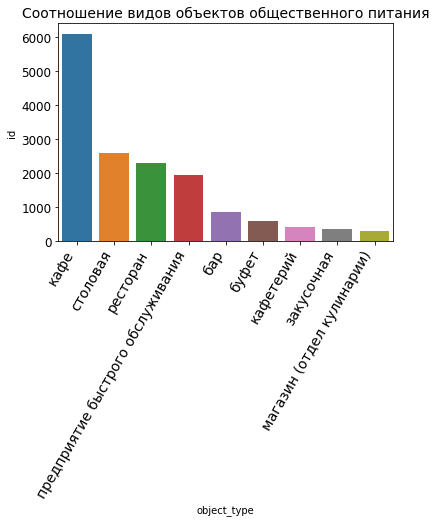

In [7]:
sort_object = df.groupby(df['object_type'])['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
sns.barplot(x='object_type', y='id', data=sort_object)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Соотношение видов объектов общественного питания', fontsize=14)

Самыми популярными заведениями в Москве являются кафе. Это и не удивительно — можно быстро перекусить, средняя цена за еду, большой выбор блюд. Столовых почти в 2.5 раза меньше. За ними идут рестораны, вероятно, их меньше из-за того, что открыть хороший ресторан непросто, ценник выше, время ожидания блюда больше, чем в кафе, а ходят в них, обычно, по особым случаям. Меньше всего закусочных и отделов кулинарии в магазинах.

Теперь исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

Text(0.5, 1.0, 'Соотношение сетевых и несетевых заведений')

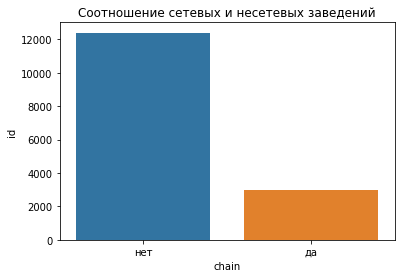

In [8]:
chain_object = df.groupby(df['chain'])['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
sns.barplot(x='chain', y='id', data=chain_object)
plt.title('Соотношение сетевых и несетевых заведений')

([<matplotlib.patches.Wedge at 0x7f93b6b1a340>,
 [Text(-1.8072363804867424, 1.25455038362163, 'нет'),
  Text(1.8072362630272498, -1.254550552827307, 'да')],
 [Text(-0.985765298447314, 0.6843002092481617, '80.7%'),
  Text(0.9857652343784998, -0.6843003015421674, '19.3%')])

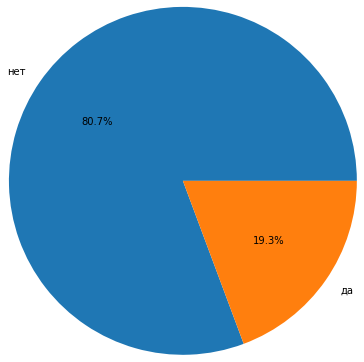

In [9]:
plt.pie(chain_object['id'], labels=chain_object['chain'], autopct='%0.1f%%', radius=2)

Всего 19.3% заведений в Москве являются сетевыми.

Узнаем, для какого вида общественного питания характерно сетевое распространение.

Text(0.5, 1.0, 'Соотношение видов сетевых заведений')

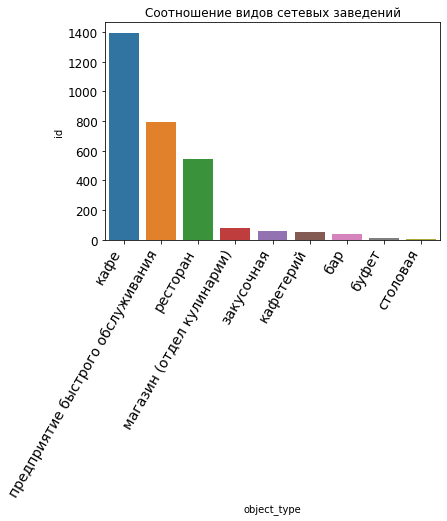

In [10]:
chain = df.query('chain == "да"').reset_index(drop=True)
chain_type = chain.groupby('object_type')['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
sns.barplot(x='object_type', y='id', data=chain_type)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Соотношение видов сетевых заведений')

<AxesSubplot:xlabel='object_type'>

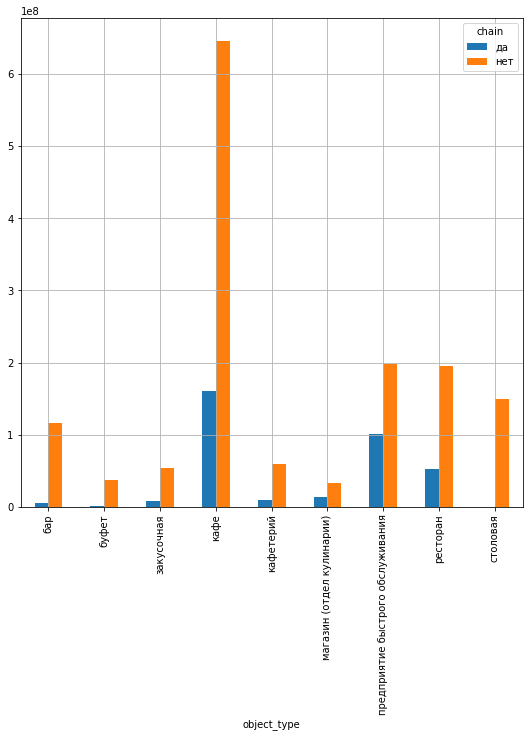

In [11]:
(df.pivot_table(index='object_type', columns='chain', values='id', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(9,9))
)

Чаще всего сетевыми бывают кафе, за ними идут предприятия быстрого обслуживания и рестораны. Но по процентному соотношению сетевых к несетевым заведениям на первом месте предприятия быстрого обслуживания, за ними отделы кулинарии в магазинах, рестораны и только потом кафе. 

Теперь узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [12]:
chain

,id,object_name,chain,object_type,address,number
0,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
1,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
2,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
3,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
4,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
2963,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
2964,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
2965,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
2966,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


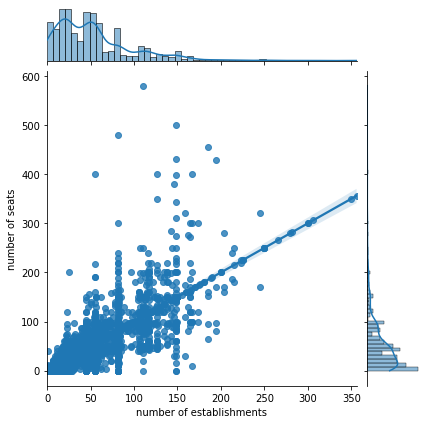

In [13]:
chain['mean'] = chain.groupby('object_name')['number'].transform('mean')
chain = chain.rename(columns={'mean' : 'number of establishments', 'number' : 'number of seats'})
sns.jointplot(x='number of establishments', y='number of seats', data=chain, kind='reg')

Для большинства сетевых заведений характерно небольшое количество мест и большое количество заведений, но встречаются также и сети с большим количеством заведений и мест.

Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Узнаем, какой вид предоставляет в среднем самое большое количество посадочных мест, построим график.

Text(0.5, 1.0, 'Среднее количество посадочных мест')

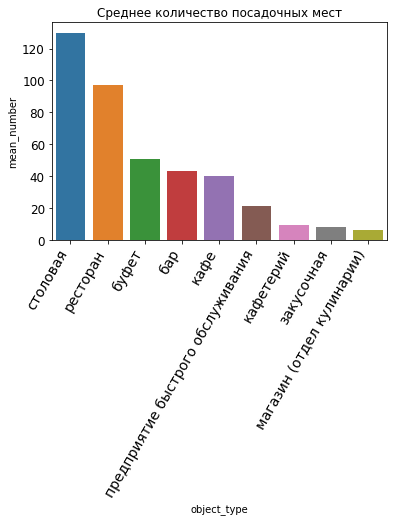

In [14]:
df['mean_number'] =  df.groupby('object_type')['number'].transform('mean').round()
object_number = df[['object_type', 'mean_number']].reset_index(drop=True).sort_values(by='mean_number', ascending=False)
sns.barplot(x='object_type', y='mean_number', data=object_number)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Среднее количество посадочных мест')

Больше всего посадочных мест в столовых, за ними идут рестораны. Меньше всего — в закусочных и отделах кулинарии. Это не удивительно, учитывая размеры помещений.

Выделим в отдельный столбец информацию об улице из столбца `address`.

In [15]:
def street(data):
    name_street = ['улица',
                   'бульвар',
                   'шоссе',
                   'проезд',
                   'переулок',
                   'набережная',
                   'проспект',
                   'линия',
                   'тупик',
                   'километр',
                   'аллея',
                   'площадь'
                  ]

    for street in data:
        for name in name_street:
            if name in street:
                return street

df['street'] = df['address'].str.split(', ').apply(street)
df

,id,object_name,chain,object_type,address,number,mean_number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,40.0,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,40.0,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,40.0,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,40.0,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,40.0,Абрамцевская улица
...,...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,40.0,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,40.0,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,40.0,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,40.0,Киевское шоссе


Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [16]:
# таблица с округами
spreadsheet_id = '1fGtfX_6otenOiCBRzt61bQe9l3gB7B8BEp-qPcWkRKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets = moscow_streets.rename(columns={'streetname' : 'street'})
display(moscow_streets.head())

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


<AxesSubplot:title={'center':'Топ-10 улиц'}, xlabel='street'>

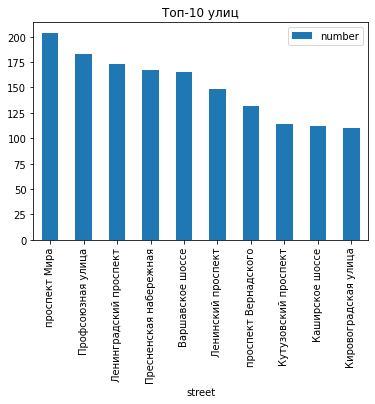

In [17]:
street_table = df.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).rename(columns={'id' : 'number'})
street_table.head(10).plot(kind='bar', title='Топ-10 улиц')

In [18]:
street_table_full = street_table.head(10).merge(moscow_streets, on='street', how='left')
street_table_full = street_table_full.drop(['areaid'], axis=1)
street_table_full

,street,number,okrug,area
0,проспект Мира,204,СВАО,Алексеевский район
1,проспект Мира,204,СВАО,Ярославский Район
2,проспект Мира,204,СВАО,Район Марьина роща
3,проспект Мира,204,СВАО,Останкинский район
4,проспект Мира,204,СВАО,Район Ростокино
5,проспект Мира,204,СВАО,Район Свиблово
6,проспект Мира,204,ЦАО,Мещанский район
7,Профсоюзная улица,183,ЮЗАО,Академический район
8,Профсоюзная улица,183,ЮЗАО,Район Черемушки
9,Профсоюзная улица,183,ЮЗАО,Район Ясенево


Итак, самые популярные улицы, округа, к которым они относятся и районы:
* проспект Мира — ЦАО, СВАО, районы: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино;
* Профсоюзная улица — ЮЗАО, районы: Академический, Коньково, Обручевский, Тёплый стан, Черёмушки, Ясенево;
* Ленинградский проспект — САО, районы: Беговой, Аэропорт, Сокол, Хорошёвский;
* Пресненская набережная — ЦАО, район: Пресненский;
* Варшавское шоссе — ЮАО, ЮЗАО, НАО, районы: Донской, Нагатино-Садовники, Нагорный, Чертаново (Южное, Северное, Цетральное), Южное Бутово, Щербинка;
* Ленинский проспект — ЦАО, ЮАО, ЮЗАО, ЗАО, районы: Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино;
* проспект Вернадского — ЮЗАО, ЗАО, районы: Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино; 
* Кутузовский проспект — ЗАО, районы: Дорогомилово, Фили-Давыдково;
* Каширское шоссе — ЮАО, районы: Москворечье-Сабурово, Орехово-Борисово (Северное, Южное), Нагатино-Садовники; 
* Кировоградская улица — ЮАО, районы: Чертаново (Северное, Центральное, Южное).

Найдём число улиц с одним объектом общественного питания, ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [19]:
street_table.query('number == 1').count()

number    563
dtype: int64

In [20]:
street_with_one_rest = street_table.query('number == 1').merge(moscow_streets, on='street', how='left')
street_with_one_rest = street_with_one_rest.drop(['areaid'], axis=1)
street_with_one_rest['count'] = street_with_one_rest.groupby('okrug')['okrug'].transform('count')
street_with_one_rest = street_with_one_rest.sort_values(by='count', ascending=False)
street_with_one_rest.head(20)

,street,number,okrug,area,count
608,Малая Переяславская улица,1,ЦАО,Мещанский район,186.0
201,Композиторская улица,1,ЦАО,Район Арбат,186.0
209,улица Савельева,1,ЦАО,Район Хамовники,186.0
486,Воротниковский переулок,1,ЦАО,Тверской район,186.0
481,Выползов переулок,1,ЦАО,Мещанский район,186.0
478,2-я Дубровская улица,1,ЦАО,Таганский район,186.0
475,Лефортовский переулок,1,ЦАО,Басманный район,186.0
221,2-й Колобовский переулок,1,ЦАО,Тверской район,186.0
225,Старомонетный переулок,1,ЦАО,Район Якиманка,186.0
229,Столовый переулок,1,ЦАО,Пресненский район,186.0


<AxesSubplot:title={'center':'Топ-10 районов с 1 рестораном'}, xlabel='area'>

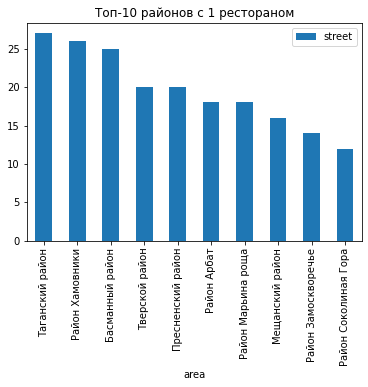

In [21]:
top_area = street_with_one_rest.groupby('area').agg({'street':'count'}).sort_values(by='street', ascending=False)
top_area.head(10).plot(kind='bar', title='Топ-10 районов с 1 рестораном')

563 улицы с одним заведением, большинство из них находится в ЦАО. В общем, они расположены в тех же районах и округах, что и топ-10 улиц.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [22]:
df_top = df.merge(street_table.head(10), on='street', how='right')
df_top

,id,object_name,chain,object_type,address,number_x,mean_number,street,number_y
0,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,40.0,проспект Мира,204
1,69300,Ваби-Саби,да,кафе,"город Москва, проспект Мира, дом 29",64,40.0,проспект Мира,204
2,71378,Шоколадница,да,кафе,"город Москва, проспект Мира, дом 29",40,40.0,проспект Мира,204
3,146123,Джаганнат,да,кафе,"город Москва, проспект Мира, дом 31",25,40.0,проспект Мира,204
4,137644,Krispy Creme,да,кафе,"город Москва, проспект Мира, дом 40",36,40.0,проспект Мира,204
...,...,...,...,...,...,...,...,...,...
1503,210964,Бургер Кинг,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 9, кор...",43,21.0,Кировоградская улица,110
1504,216579,СтардогS,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 14",0,21.0,Кировоградская улица,110
1505,205563,МСК Московская сеть кальянных,да,бар,"город Москва, Кировоградская улица, дом 24А",100,43.0,Кировоградская улица,110
1506,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0,21.0,Кировоградская улица,110


Text(0.5, 1.0, 'Количество посадочных мест')

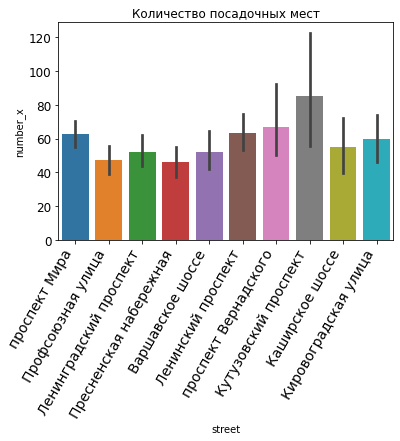

In [23]:
sns.barplot(x='street', y='number_x', data= df_top)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Количество посадочных мест')

По числу посадочных мест лидируют заведения на Кутузовском проспекте, но в большинстве заведений 50-60 мест.

## Вывод

Итак, можно сделать следующие выводы:
1. Самый популярный тип заведения — кафе, за ними идут столовые и рестораны.
2. 80.7% заведений — несетевые. При этом чаще всего сетевыми бывают кафе, за ними идут предприятия быстрого обслуживания и рестораны. Но по процентному соотношению сетевых к несетевым заведениям на первом месте предприятия быстрого обслуживания, за ними отделы кулинарии в магазинах и рестораны и только потом кафе.
3. Для сетевых заведений более характерно большое число мест и небольшое количество заведений.
4. Самое большое количество посадочных мест в столовых, за ними с относительно небольшим отрывом идут рестораны.
5. Большинство заведений расположено на улицах проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.
6. На "популярных улицах" в среднем по 50-60 мест. 

**Рекомендации**:
1. Наиболее выгодным вариантом будет предприятие быстрого обслуживания с 20-30 местами или ресторан с 80-100 местами. У обоих видов заведений относительно низкая конкуренция и большой шанс стать сетью (у предприятия быстрого обслуживания шанс немного выше). Преимуществом ресторана будут более высокие цены, благодаря которым и легче будет заработать деньги на обслуживание роботов, и, в то же время, поднять цены именно засчёт "необычного обслуживания".
2. Выбирать место следует в округах ЦАО, ЮАО, САО, ЮВАО. С одной стороны, можно выбрать улицы, где нет бешеной конкуренции, с другой стороны, можно найти место с красивой локацией.

Презентация: https://yadi.sk/i/FhfaiOttJkP6Ew